In [21]:
import tensorflow as tf
import numpy as np
import config
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import MachineLearning

In [51]:
data_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/EvalData/'
model_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/TestModel'
CFP = config.CFP

In [52]:
sys.argv[1] = 'evaluation'
config.ResetValue('MLEvaluation','observation_source',data_dir)
config.ResetValue('MLEvaluation','data_source',data_dir)
config.ResetValue('MachineLearning','save_dir',model_dir)
import tensorflow as tf
tf.reset_default_graph()
from importlib import reload
reload(MachineLearning)
pred,loss = MachineLearning.test()

saver restore from:/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/TestModel/checkpoint_20000
INFO:tensorflow:Restoring parameters from /Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/TestModel/checkpoint_20000
Predict complete, cost [  0] seconds


In [53]:
loss

0.19422872

In [54]:
X = MachineLearning._X
Y = MachineLearning._Y

In [68]:
X.std(axis=0)

array([36.79054225,  0.05352442])

In [55]:
diff = pred - Y

In [56]:
diff.shape

(10000, 5)

In [57]:
diff_seq = (diff ** 2).mean(axis=1)

In [58]:
rel_diff_seq = abs(diff/Y).mean(axis=1)

In [60]:
diff_norm = (diff ** 2).sum(axis = 1)
truth_norm = (Y ** 2).sum(axis = 1)

In [61]:
rel_error = diff_norm / truth_norm

[-600, 300, 1e-07, 1.0]

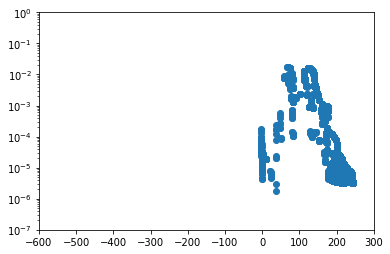

In [63]:
plt.scatter(X[:,0],rel_error)
plt.yscale('log')
plt.axis([-600,300,1e-7,1e0])

[-600, 300, 0.0001, 100000.0]

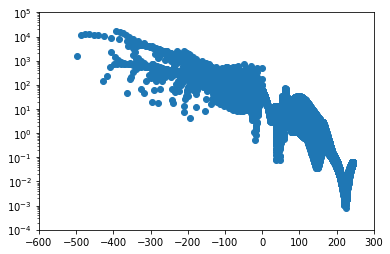

In [48]:
plt.scatter(X[:,0],diff_seq)
plt.yscale('log')
plt.axis([-600,300,1e-4,1e5])

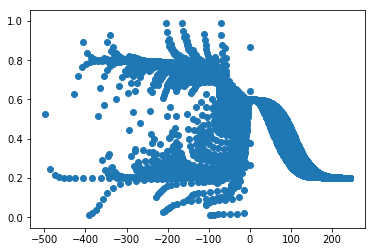

In [37]:
plt.scatter(X[:,0],X[:,1])

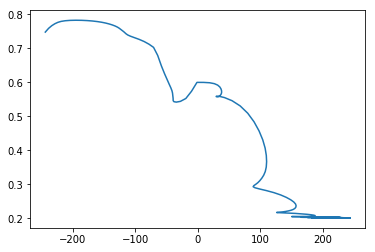

In [38]:
plt.plot(X[1000:2000,0],X[1000:2000,1])